In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [61]:
ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_CCLE_PD_0325901_retrain/CCLE_PD_0325901_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

ccle_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
                                         "avg_3_features_train", "avg_3_features_test", 
                                         "avg_5_features_train", "avg_5_features_test", 
                                         "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
ccle_combined_df["dataset"] = "CCLE"

ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_performance_retrain/performance_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

performance_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
                                         "avg_3_features_train", "avg_3_features_test", 
                                         "avg_5_features_train", "avg_5_features_test", 
                                         "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
performance_combined_df["dataset"] = "Performance"

ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_parkinsons_retrain/parkinsons_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

parkinsons_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
                                         "avg_3_features_train", "avg_3_features_test", 
                                         "avg_5_features_train", "avg_5_features_test", 
                                         "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
parkinsons_combined_df["dataset"] = "Parkinsons"

ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_temperature_retrain/temperature_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

temperature_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
                                         "avg_3_features_train", "avg_3_features_test", 
                                         "avg_5_features_train", "avg_5_features_test", 
                                         "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
temperature_combined_df["dataset"] = "Temperature"

combined_df_all = pd.concat([ccle_combined_df, performance_combined_df, parkinsons_combined_df, temperature_combined_df], ignore_index=True)

In [62]:
combined_df_all = combined_df_all[combined_df_all["fi"] != "Random"] 

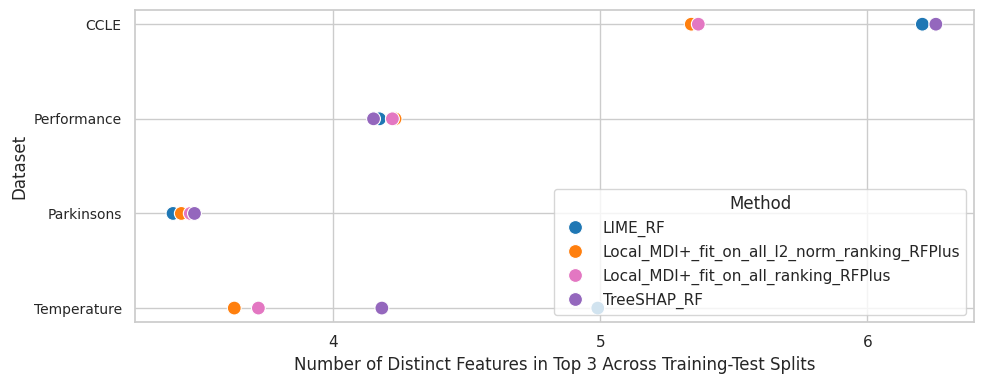

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
palette = {
    'LIME_RF': '#1f77b4',  # Bold blue
    'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
    'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
    'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
    'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
    'TreeSHAP_RF': '#9467bd',  # Bold purple
    # 'Random': '#ad494a',  # warm red
}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))  
sns.scatterplot(
    data=combined_df_all,
    x='avg_3_features_train',
    y='dataset',
    hue='fi',
    palette=palette,
    s=100  # Size of the dots
)

# Customize the legend
plt.legend(title='Method', loc='lower right')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of Distinct Features in Top 3 Across Training-Test Splits')
plt.ylabel('Dataset')

plt.yticks(fontsize=10)  
plt.tight_layout()
plt.show()

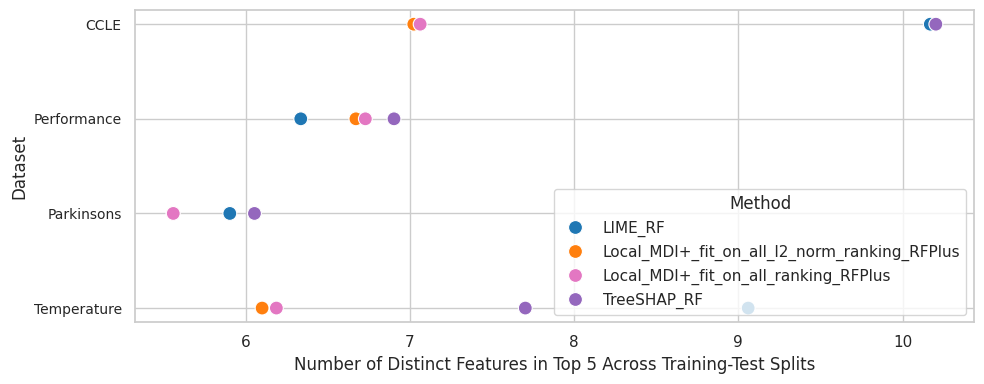

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'LIME_RF': '#1f77b4',  # Bold blue
    'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
    'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
    'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
    'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
    'TreeSHAP_RF': '#9467bd',  # Bold purple
    # 'Random': '#ad494a',  # warm red
}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))  
sns.scatterplot(
    data=combined_df_all,
    x='avg_5_features_train',
    y='dataset',
    hue='fi',
    palette=palette,
    s=100  # Size of the dots
)

# Customize the legend
plt.legend(title='Method', loc='lower right')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of Distinct Features in Top 5 Across Training-Test Splits')
plt.ylabel('Dataset')

plt.yticks(fontsize=10)  
plt.tight_layout()
plt.show()

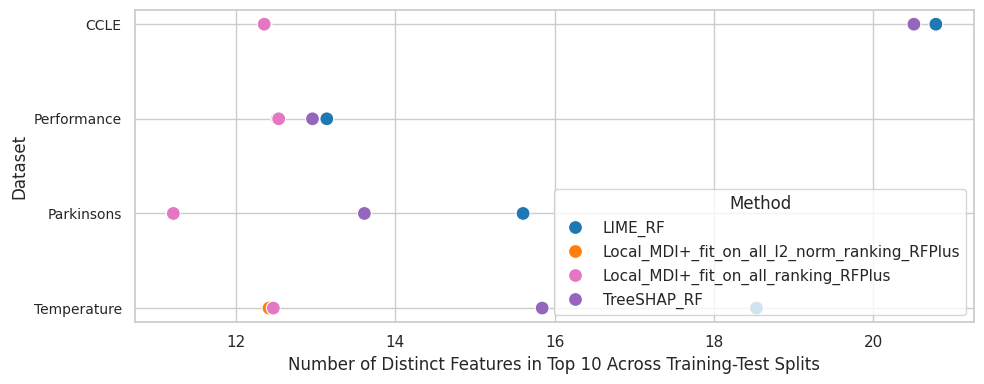

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'LIME_RF': '#1f77b4',  # Bold blue
    'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
    'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
    'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
    'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
    'TreeSHAP_RF': '#9467bd',  # Bold purple
    # 'Random': '#ad494a',  # warm red
}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))  
sns.scatterplot(
    data=combined_df_all,
    x='avg_10_features_train',
    y='dataset',
    hue='fi',
    palette=palette,
    s=100  # Size of the dots
)

# Customize the legend
plt.legend(title='Method', loc='lower right')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of Distinct Features in Top 10 Across Training-Test Splits')
plt.ylabel('Dataset')

plt.yticks(fontsize=10)  
plt.tight_layout()
plt.show()

In [ ]:
assert False

### Summarise the Ablation Data

In [33]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 683.0 and the test size is 337.0


In [26]:
combined_df["fi"].unique()

array(['LIME_RF', 'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_all_ranking_RFPlus', 'Random', 'TreeSHAP_RF'],
      dtype=object)

### Plot the Ablation Data Performance

In [27]:
methods = ['LIME_RF', 
#         'Local_MDI+_fit_on_all_RFPlus',
#        'Local_MDI+_fit_on_all_average_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_all_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_all_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_all_ranking_RFPlus',
#        'Local_MDI+_fit_on_all_ranking_ridge_RFPlus',
#        'Local_MDI+_fit_on_inbag_RFPlus',
#        'Local_MDI+_fit_on_inbag_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_ranking_ridge_RFPlus',
#        'Local_MDI+_fit_on_oob_RFPlus',
#        'Local_MDI+_fit_on_oob_average_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_oob_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_oob_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_oob_ranking_RFPlus',
#        'Local_MDI+_fit_on_oob_ranking_ridge_RFPlus',
        # 'Random',
       'TreeSHAP_RF']

num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R2"], "classification": ["AUROC", "LogLoss"]} #MSE
ablation_models = {"regression": ["RF_Regressor"],#, "Linear_Regressor"],
                   "classification": ["RF_Classifier", "Logistic_Regression"]}

KeyError: 'num_features_masked'

In [ ]:
color_map = {
    'LIME_RF': '#1f77b4',  # Bold blue
    'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
    'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
    'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
    'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
    'TreeSHAP_RF': '#9467bd',  # Bold purple
}

# color_map = {
#     'LIME_RF': '#1f77b4',  # bold blue
#     'Local_MDI+_fit_on_all_RFPlus': '#ff7f0e',  # vibrant orange
#     'Local_MDI+_fit_on_all_average_RFPlus': '#2ca02c',  # bright green
#     'Local_MDI+_fit_on_all_error_metric_RFPlus': '#d62728',  # bright red
#     'Local_MDI+_fit_on_all_error_metric_average_RFPlus': '#9467bd',  # bold purple
#     'Local_MDI+_fit_on_all_error_metric_ranking_RFPlus': '#8c564b',  # strong brown
#     'Local_MDI+_fit_on_all_l2_norm_RFPlus': '#e377c2',  # pink
#     'Local_MDI+_fit_on_all_l2_norm_average_RFPlus': '#bcbd22',  # lime green
#     'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#17becf',  # cyan
#     'Local_MDI+_fit_on_all_ranking_RFPlus': '#7f7f7f',  # medium gray
#     'Local_MDI+_fit_on_all_ranking_ridge_RFPlus': '#bc5a34',  # burnt orange
#     'Local_MDI+_fit_on_inbag_RFPlus': '#000000',  # black
#     'Local_MDI+_fit_on_inbag_average_RFPlus': '#7fbc41',  # moss green
#     'Local_MDI+_fit_on_inbag_error_metric_RFPlus': '#ff9896',  # light coral
#     'Local_MDI+_fit_on_inbag_error_metric_average_RFPlus': '#aec7e8',  # light blue
#     'Local_MDI+_fit_on_inbag_error_metric_ranking_RFPlus': '#9edae5',  # light cyan
#     'Local_MDI+_fit_on_inbag_l2_norm_RFPlus': '#b29189',  # warm taupe
#     'Local_MDI+_fit_on_inbag_l2_norm_average_RFPlus': '#c49c94',  # peach
#     'Local_MDI+_fit_on_inbag_l2_norm_ranking_RFPlus': '#dbdb8d',  # soft yellow-green
#     'Local_MDI+_fit_on_inbag_ranking_RFPlus': '#393b79',  # dark blue
#     'Local_MDI+_fit_on_inbag_ranking_ridge_RFPlus': '#637939',  # dark olive green
#     'Local_MDI+_fit_on_oob_RFPlus': '#8c6d31',  # earthy brown
#     'Local_MDI+_fit_on_oob_average_RFPlus': '#843c39',  # dark brick red
#     'Local_MDI+_fit_on_oob_error_metric_RFPlus': '#7b4173',  # deep purple
#     'Local_MDI+_fit_on_oob_error_metric_average_RFPlus': '#6b6ecf',  # muted indigo
#     'Local_MDI+_fit_on_oob_error_metric_ranking_RFPlus': '#5254a3',  # steel blue
#     'Local_MDI+_fit_on_oob_l2_norm_RFPlus': '#8ca252',  # olive
#     'Local_MDI+_fit_on_oob_l2_norm_average_RFPlus': '#bd9e39',  # mustard yellow
#     'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#d6616b',  # muted pink
#     'Local_MDI+_fit_on_oob_ranking_RFPlus': '#ce6dbd',  # bright magenta
#     'Local_MDI+_fit_on_oob_ranking_ridge_RFPlus': '#de9ed6',  # soft magenta
#     'Random': '#ad494a',  # warm red
#     'TreeSHAP_RF': '#6baed6',  # sky blue
# }

In [ ]:
if num_features > 20:
    all_ratios = [0.01, 0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
else:
    all_ratios = [0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
num_features_selected = []
for r in all_ratios:
    num_features_selected.append(combined_df[f"num_features_selected_{r}"].unique()[0])

#### Summary of results

In [ ]:
# results = {}
# for a_model in ["RF_Regressor"]:
#     for metric in ["MSE"]:
#         for m in methods:
#             results[m] = []
#         for m in methods:
#             for k in all_ratios:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

# filtered_sums = {
#     key: sum(values[:5]) 
#     for key, values in results.items()
# }
# sorted(filtered_sums, key=filtered_sums.get)

# import pickle

# list_dict = {element: index + 1 for index, element in enumerate(sorted(filtered_sums, key=filtered_sums.get))}

# with open("temperature_rank.pkl", "wb") as file:
#     pickle.dump(list_dict, file)

# print("Dictionary saved as pickle file:", list_dict)

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))

for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in all_ratios:
                results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

        # excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}
        # filtered_sums = {
        #     key: sum(values[:5]) 
        #     for key, values in results.items() if key not in excluded_keys
        # }
        # if metric == "MSE" or metric == "LogLoss":
        #     top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]
        # else:
        #     top_3_keys =sorted(filtered_sums, key=filtered_sums.get, reverse=True)[:3]
        # top_3_keys.extend(['LIME_RF', 'TreeSHAP_RF'])

        ax = axs[j]#, j]
        for m in methods:#top_3_keys:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "LIME_RF", "Random"]:
                ax.plot(num_features_selected, results[m], label=m, linestyle='dashed', color=color, marker='o')
            else:
                ax.plot(num_features_selected, results[m], label=m, color=color, marker='o')
        ax.set_xticks(num_features_selected)
        ax.set(
            xlabel='Number of features selected',
            ylabel=f"{metric}",
            title=f'Ablation model = {a_model}'
        )
        ax.legend()

plt.tight_layout()
#plt.savefig(f"./Ionosphere.png")
plt.show()


In [ ]:
results

In [ ]:
# Filtered keys to exclude
excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}

# Compute the sum of the first five numbers for each key (excluding the specified keys)
filtered_sums = {
    key: sum(values[:5]) 
    for key, values in results.items() if key not in excluded_keys
}

# Sort the keys by their sum and extract the top 3 keys with the lowest sums
top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]

In [ ]:
top_3_keys

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in all_ratios:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_top_{k}"].mean())
        ax = axs[j] 
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF",  "LIME_RF", "Random"]:
                ax.plot(num_features_selected, results[m], label=m, linestyle='dashed', color=color, marker='o')
            else:
                ax.plot(num_features_selected, results[m], label=m, color=color, marker='o')
        ax.set_xticks(num_features_selected)
        ax.set(xlabel='Number of features selected', ylabel= f"{metric}",
            title=f'Ablation model = {a_model}')
        if i == 0 and j==0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}.png")
plt.show()

In [ ]:
assert False
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        # Initialize a new figure for each plot
        fig, ax = plt.subplots(figsize=(18, 8))
        
        results = {}
        for m in methods:
            results[m] = []
        
        for m in methods:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_after_ablation_{k}_absolute"].mean())
        
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "LIME_RF", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color, marker='o', markersize=4)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color, marker='o', markersize=4)
        
        ax.set_xticks(range(num_features+1))
        ax.set(xlabel='Number of features masked', ylabel=f"{metric}",
               title=f'Ablation model = {a_model}')
        
        # Add legend only once for each figure
        if j == 0:
            ax.legend()
        
        plt.tight_layout()
        # Optionally save each plot as a separate file
        # plt.savefig(f"./{task_name}_{task}_model_{a_model}_metric_{metric}.png")
        plt.show()


In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[j] 
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF",  "LIME_RF", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color, marker='o', markersize=4)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color, marker='o', markersize=4)
        ax.set_xticks(range(num_features+1))
        ax.set(xlabel='Number of features selected', ylabel= f"{metric}",
            title=f'Ablation model = {a_model}')
        if i == 0 and j==0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}.png")
plt.show()

#### Training Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

### Test subset

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_absolute"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

### Test set

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_absolute"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#             #     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean()))
#                 for k in range(num_features+1):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_absolute"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# #plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
# plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_train_addition.png")
# plt.show()

#### Test Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test_subset:
#             results[m] = []
#         for m in methods_test_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
# plt.show()

#### Test Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test:
#             results[m] = []
#         for m in methods_test:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = {test_size}')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = {test_size}')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_addition.png")
# plt.show()